# Case 3: Dansk Industri, del 1
*Anders Reinholt Sindberg (dks656) & Albert Neve Alsbjerg (kmp116)*


## Indholdsfortegnelse
- Indledning
- Klargøring og import
- Delanalyse 1
- Delanalyse 2
- Delanalyse 3

## Klargøring og import
Til databehandklingen vil følgende biblioteker blive brugt
- **pandas** til at strukturere vores data
- **numpy** til matematiske funktioner
- **matplotlib** til at plotte og illustrere data

De vil nu blive importeret:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Delanalyse 1
Først importeres bilag 5:

In [2]:
#bilaget importeres, ID sættes som indeks for datasættet. Dertil tilføjes datatyper til udvalgte kolonner
bilag5 = pd.read_excel("bilag_5.xlsx", \
                       index_col=0, \
                       dtype={'ID': int,
                                'DI antal ansatte opgivet':int,
                                "DI Byg":int, 
                                "DI Energi":int, 
                                "DI Fødevarer":int, 
                                "DI Handel":int, 
                                "DI Digital":int, 
                                "DI Service":int, 
                                "DI Rådgiverne":int, 
                                "DI Transport":int, 
                                "Bilbranchen":int,
                                "DI Dansk Byggeri":int})
#inspiceres
bilag5

,Virk postnr,Virk postdistrikt,Medlemsstatus,Medlemstype,DI antal ansatte opgivet,Branche kode,Virk region,Virk land,DI Byg,DI Energi,...,Bilbranchen,Træ- og Møbelindustrien,ATL - Transportens Arbejdsgivere,Mejeribrugets Arbejdsgiverforening,DI Dansk Byggeri,Brug,DI indmeldelsesdato,Har besvaret MTU2020,Unnamed: 25,Har besvaret NPM2020
ID,,,,,,,,,,,,,,,,,,,,,
1,2300,København S,HOF,MEDLEM,7386,53.10.00,Region Hovedstaden,Danmark,0,0,...,0,0,0,0,0,Meget brug,2004-10-01,Ja,6,Nej
2,8260,Viby J,HOF,MEDLEM,7232,10.51.00,Region Midtjylland,Danmark,0,0,...,0,0,0,1,0,Meget brug,2012-07-01,Nej,Ikke besvaret,Nej
3,2860,Søborg,HOF,MEDLEM,5917,81.21.00,Region Hovedstaden,Danmark,0,0,...,0,0,0,0,0,Meget brug,2005-07-01,Ja,7,Nej
4,7330,Brande,HOF,MEDLEM,5701,28.11.10,Region Midtjylland,Danmark,0,1,...,0,0,0,0,0,Meget brug,2014-01-01,Ja,9,Nej
5,8960,Randers SØ,HOF,MEDLEM,5373,10.11.10,Region Midtjylland,Danmark,0,0,...,0,0,0,0,0,Meget brug,2002-07-01,Nej,Ikke besvaret,Nej
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12577,2791,Dragør,HOF,MEDLEM,36,81.30.00,Region Midtjylland,Danmark,0,0,...,0,0,0,0,1,Lidt brug,2020-09-01,Nej,Ikke besvaret,NaN
12578,2600,Glostrup,HOF,MEDLEM,36,43.12.00,Region Sjælland,Danmark,0,0,...,0,0,0,0,1,Lidt brug,2020-09-01,Nej,Ikke besvaret,NaN
12579,8830,Tjele,HOF,MEDLEM,36,43.32.00,Region Sjælland,Danmark,0,0,...,0,0,0,0,1,Lidt brug,2020-09-01,Nej,Ikke besvaret,NaN


### Segmentering
Vi vælger at segmentere medlemmerne i følgende 2 dimensioner:
- Antal ansatte
- Branche

Følgende vil gennemgå hvordan vi har fundet frem til denne segmentering.

#### Segmentering af antal ansatte
Vi vælger at inddele medlemmerne i følgende segmenter:
Vi inddeler efter størrelse ud fra bilag 6: 
- 0-4: mikro
- 5-20: små
- 21-100: mellemstore
- 101-499: store
- 500+ meget stor

Pba. særlig relationsordning for medlemmer med minimum 500 ansatte sorteres disse for sig i analysen.

In [3]:
# simpel funktion, der inddeler virksomheden i størrelses kategori
def categorize_size(row):
    size = row["DI antal ansatte opgivet"]
    if size < 5:
        return "0:mikro"
    if size < 21:
        return "1:lille"
    if size < 101:
        return "2:mellemstor"
    if size < 500:
        return "3:stor"
    if size > 499:
        return "4:meget stor"
    else:
        return np.nan

# funktionen køres på hvert medlem, og inddelingen gemmes i ny kolonne med navnet "størrelse"
bilag5["størrelse"] = bilag5.apply(categorize_size, axis=1)
bilag5

,Virk postnr,Virk postdistrikt,Medlemsstatus,Medlemstype,DI antal ansatte opgivet,Branche kode,Virk region,Virk land,DI Byg,DI Energi,...,Træ- og Møbelindustrien,ATL - Transportens Arbejdsgivere,Mejeribrugets Arbejdsgiverforening,DI Dansk Byggeri,Brug,DI indmeldelsesdato,Har besvaret MTU2020,Unnamed: 25,Har besvaret NPM2020,størrelse
ID,,,,,,,,,,,,,,,,,,,,,
1,2300,København S,HOF,MEDLEM,7386,53.10.00,Region Hovedstaden,Danmark,0,0,...,0,0,0,0,Meget brug,2004-10-01,Ja,6,Nej,4:meget stor
2,8260,Viby J,HOF,MEDLEM,7232,10.51.00,Region Midtjylland,Danmark,0,0,...,0,0,1,0,Meget brug,2012-07-01,Nej,Ikke besvaret,Nej,4:meget stor
3,2860,Søborg,HOF,MEDLEM,5917,81.21.00,Region Hovedstaden,Danmark,0,0,...,0,0,0,0,Meget brug,2005-07-01,Ja,7,Nej,4:meget stor
4,7330,Brande,HOF,MEDLEM,5701,28.11.10,Region Midtjylland,Danmark,0,1,...,0,0,0,0,Meget brug,2014-01-01,Ja,9,Nej,4:meget stor
5,8960,Randers SØ,HOF,MEDLEM,5373,10.11.10,Region Midtjylland,Danmark,0,0,...,0,0,0,0,Meget brug,2002-07-01,Nej,Ikke besvaret,Nej,4:meget stor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12577,2791,Dragør,HOF,MEDLEM,36,81.30.00,Region Midtjylland,Danmark,0,0,...,0,0,0,1,Lidt brug,2020-09-01,Nej,Ikke besvaret,NaN,2:mellemstor
12578,2600,Glostrup,HOF,MEDLEM,36,43.12.00,Region Sjælland,Danmark,0,0,...,0,0,0,1,Lidt brug,2020-09-01,Nej,Ikke besvaret,NaN,2:mellemstor
12579,8830,Tjele,HOF,MEDLEM,36,43.32.00,Region Sjælland,Danmark,0,0,...,0,0,0,1,Lidt brug,2020-09-01,Nej,Ikke besvaret,NaN,2:mellemstor


### Mål for besvarelsesprocent
Det måler vi ved at konstruere et simpelt indeks fra 0-2 med antallet af målinger det eneklte medlem har deltaget i. 

In [4]:
# simpel funktion, der retunerer antallet af målinger medlemmet har deltaget i
def number_participated(row):
    result = 0
    if row["Har besvaret MTU2020"] == "Ja":
        result += 1
    if row["Har besvaret NPM2020"] == "Ja":
        result += 1
    return result
    
# funktionen køres på hvert medlem, og scoren gemmes i en ny kolonne med navnet "point"
bilag5["point"] = bilag5.apply(number_participated, axis=1)
bilag5.head(5)

,Virk postnr,Virk postdistrikt,Medlemsstatus,Medlemstype,DI antal ansatte opgivet,Branche kode,Virk region,Virk land,DI Byg,DI Energi,...,ATL - Transportens Arbejdsgivere,Mejeribrugets Arbejdsgiverforening,DI Dansk Byggeri,Brug,DI indmeldelsesdato,Har besvaret MTU2020,Unnamed: 25,Har besvaret NPM2020,størrelse,point
ID,,,,,,,,,,,,,,,,,,,,,
1,2300,København S,HOF,MEDLEM,7386,53.10.00,Region Hovedstaden,Danmark,0,0,...,0,0,0,Meget brug,2004-10-01,Ja,6,Nej,4:meget stor,1
2,8260,Viby J,HOF,MEDLEM,7232,10.51.00,Region Midtjylland,Danmark,0,0,...,0,1,0,Meget brug,2012-07-01,Nej,Ikke besvaret,Nej,4:meget stor,0
3,2860,Søborg,HOF,MEDLEM,5917,81.21.00,Region Hovedstaden,Danmark,0,0,...,0,0,0,Meget brug,2005-07-01,Ja,7,Nej,4:meget stor,1
4,7330,Brande,HOF,MEDLEM,5701,28.11.10,Region Midtjylland,Danmark,0,1,...,0,0,0,Meget brug,2014-01-01,Ja,9,Nej,4:meget stor,1
5,8960,Randers SØ,HOF,MEDLEM,5373,10.11.10,Region Midtjylland,Danmark,0,0,...,0,0,0,Meget brug,2002-07-01,Nej,Ikke besvaret,Nej,4:meget stor,0


Det undersøges, hvor mange har svaret på 0, 1, eller 2 undersøgelser:

In [5]:
print(bilag5['point'].value_counts())

0    9456
1    3125
Name: point, dtype: int64


Da ingen har deltaget i mere end 1 undersøgelse, og deltagelse kodes som 1 eller 0, er det muligt at beregne besvarelsesprocenten ved at tage gennesnittet af målet. 

### Mål for brug
Målet af brug er i øjeblikket kodet kategorisk som enten "Intet brug", "Lidt brug" eller "Meget brug". Disse vil vi nu omkode i ny variabel til 0, 1 eller 2, for at kunne trække et gennemsnit for hvert segment.

In [6]:
# simpel funktion til at omdanne svar til int
def number_used(row):
    if row["Brug"] == "Intet brug":
        return 0
    if row["Brug"] == "Lidt brug":
        return 1
    if row["Brug"] == "Meget brug":
        return 2
    else:
        return np.nan
    
# funktionen køres på hvert medlem, og scoren gemmes i en ny kolonne med navnet "brug_int"
bilag5["brug_int"] = bilag5.apply(number_used, axis=1)
bilag5.head(5)

,Virk postnr,Virk postdistrikt,Medlemsstatus,Medlemstype,DI antal ansatte opgivet,Branche kode,Virk region,Virk land,DI Byg,DI Energi,...,Mejeribrugets Arbejdsgiverforening,DI Dansk Byggeri,Brug,DI indmeldelsesdato,Har besvaret MTU2020,Unnamed: 25,Har besvaret NPM2020,størrelse,point,brug_int
ID,,,,,,,,,,,,,,,,,,,,,
1,2300,København S,HOF,MEDLEM,7386,53.10.00,Region Hovedstaden,Danmark,0,0,...,0,0,Meget brug,2004-10-01,Ja,6,Nej,4:meget stor,1,2
2,8260,Viby J,HOF,MEDLEM,7232,10.51.00,Region Midtjylland,Danmark,0,0,...,1,0,Meget brug,2012-07-01,Nej,Ikke besvaret,Nej,4:meget stor,0,2
3,2860,Søborg,HOF,MEDLEM,5917,81.21.00,Region Hovedstaden,Danmark,0,0,...,0,0,Meget brug,2005-07-01,Ja,7,Nej,4:meget stor,1,2
4,7330,Brande,HOF,MEDLEM,5701,28.11.10,Region Midtjylland,Danmark,0,1,...,0,0,Meget brug,2014-01-01,Ja,9,Nej,4:meget stor,1,2
5,8960,Randers SØ,HOF,MEDLEM,5373,10.11.10,Region Midtjylland,Danmark,0,0,...,0,0,Meget brug,2002-07-01,Nej,Ikke besvaret,Nej,4:meget stor,0,2


### Besvarelsesprocent blandt segmenter
Først beregnes besvarelsesprocent blandt virksomheder segmenteret efter størrelse.

In [7]:
split_vars = ['størrelse'] 
apply_vars = ['point']
apply_fcts = ['mean', 'size']

bilag5.groupby(split_vars)[apply_vars].agg(apply_fcts)

point      
                  mean  size
størrelse                   
0:mikro       0.259520  3125
1:lille       0.199380  4840
2:mellemstor  0.264403  3593
3:stor        0.386651   869
4:meget stor  0.409091   154

### Brug blandt segmenter
Det gennemsnitlige brug af DI's ydelser beregnes segmenteret efter størrelse:

In [8]:
split_vars = ['størrelse'] 
apply_vars = ['brug_int']
apply_fcts = ['mean', 'size']

bilag5.groupby(split_vars)[apply_vars].agg(apply_fcts)

brug_int      
                  mean  size
størrelse                   
0:mikro       1.101760  3125
1:lille       1.323760  4840
2:mellemstor  1.616198  3593
3:stor        1.804373   869
4:meget stor  1.922078   154

### Forskel på tværs af regioner?

In [9]:
split_vars = ['Virk region'] 
apply_vars = ['point', 'brug_int']
apply_fcts = ['mean', 'size']

bilag5.groupby(split_vars)[apply_vars].agg(apply_fcts)

point        brug_int      
                        mean  size      mean  size
Virk region                                       
Region Hovedstaden  0.238467  3967  1.402571  3967
Region Midtjylland  0.264242  2914  1.391215  2914
Region Nordjylland  0.260458  1267  1.366219  1267
Region Sjælland     0.232053  1797  1.374513  1797
Region Syddanmark   0.258445  2546  1.401414  2546
Ukendt              0.000000     2  1.500000     2

Der ses ikke en tendens til forskel på tværs af regioner. Men på baggrund af den nylige fusion med Dansk Byggeri, undersøges om der findes en forskel i besvarelsesprocent og brug på tværs af regioner blandt disse nye medlemmer: 

In [10]:
split_vars = ['Virk region'] 
apply_vars = ['point', 'brug_int']
apply_fcts = ['mean', 'size']

bilag5[bilag5["DI Dansk Byggeri"]==1].groupby(split_vars)[apply_vars].agg(apply_fcts)

point        brug_int      
                        mean  size      mean  size
Virk region                                       
Region Hovedstaden  0.128451  1666  1.419568  1666
Region Midtjylland  0.167147  1388  1.412104  1388
Region Nordjylland  0.165187   563  1.385435   563
Region Sjælland     0.160962  1081  1.413506  1081
Region Syddanmark   0.140760  1158  1.387737  1158
Ukendt              0.000000     2  1.500000     2

Der ses stadig ikke en tendens. Dette illustreres:

### Illustration af segmentering

Først illustreres sammenhæng med virksomhedsstørrelse. Vi lægger ud med besvarelsesprocent:

Text(0.5, 1.0, 'Svarprocent')

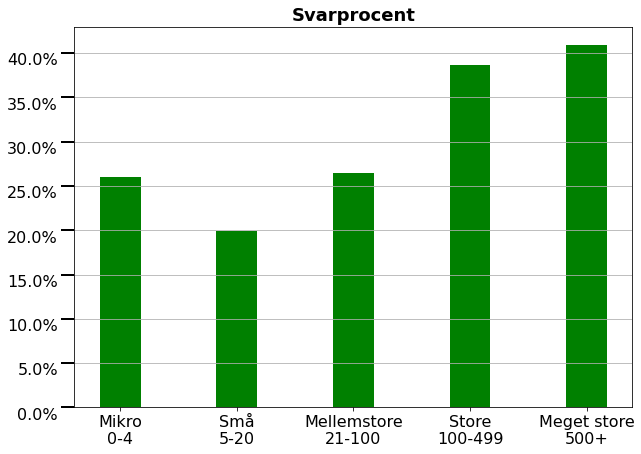

In [11]:
# samme split-apply-combine køres igen og gemmes i et midlertidigt dataframe
split_vars = ['størrelse'] 
apply_vars = ['point', 'brug_int']
apply_fcts = ['mean', 'size']

df_illu1 = bilag5.groupby(split_vars)[apply_vars].agg(apply_fcts)

# værdier og navne på x-aksen til plottet hentes ud af det midlertidige dataframe
x_labels = ['Mikro\n0-4', 'Små\n5-20', 'Mellemstore\n21-100', 'Store\n100-499', 'Meget store\n500+']
l_point = list(df_illu1['point']['mean'])


values = np.array(l_point)
x = range(len(values))

# plot
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(x, values, 0.35, color='g')

# x-aksen
x_ticks = []
for i in range(len(x_labels)):
    x_ticks.append(i)
plt.xticks(x_ticks, x_labels, \
           rotation=0, \
           fontsize='16', \
           horizontalalignment='center', \
           verticalalignment='top')

# y-aksen
plt.yticks(
          fontsize='16', \
          horizontalalignment='right', \
          verticalalignment='top')
plt.tick_params(axis='y', direction='out', length=13, width=2)
# omdan y-aksen til procent
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

# tilføj grid
plt.grid(axis = 'y')

# tilføj titel
ax.set_title('Svarprocent', \
             fontweight='bold', \
             fontsize='18')

Herefter illustreres brug af DI's ydelser:

Text(0.5, 1.0, "Brug af DI's ydelser")

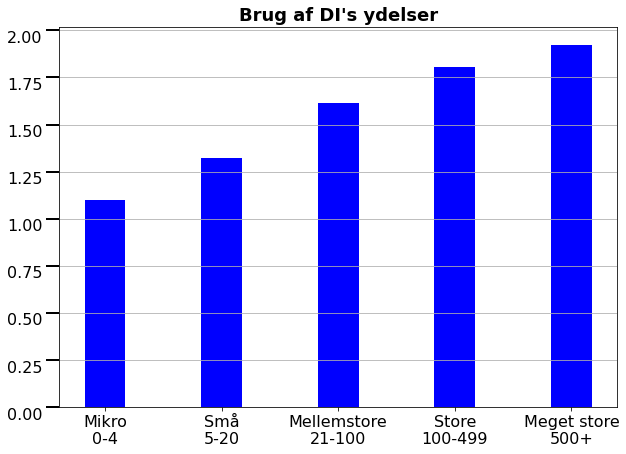

In [12]:
# samme split-apply-combine køres igen og gemmes i et midlertidigt dataframe
split_vars = ['størrelse'] 
apply_vars = ['point', 'brug_int']
apply_fcts = ['mean', 'size']

df_illu1 = bilag5.groupby(split_vars)[apply_vars].agg(apply_fcts)

# værdier og navne på x-aksen til plottet hentes ud af det midlertidige dataframe
x_labels = ['Mikro\n0-4', 'Små\n5-20', 'Mellemstore\n21-100', 'Store\n100-499', 'Meget store\n500+']
l_brug = list(df_illu1['brug_int']['mean'])


values = np.array(l_brug)
x = range(len(values))

# plot
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(x, values, 0.35, color='b')

# x-aksen
x_ticks = []
for i in range(len(x_labels)):
    x_ticks.append(i)
plt.xticks(x_ticks, x_labels, \
           rotation=0, \
           fontsize='16', \
           horizontalalignment='center', \
           verticalalignment='top')

# y-aksen
plt.yticks(
          fontsize='16', \
          horizontalalignment='right', \
          verticalalignment='top')
plt.tick_params(axis='y', direction='out', length=13, width=2)

# tilføj grid
plt.grid(axis = 'y')

# tilføj titel
ax.set_title('Brug af DI\'s ydelser', \
             fontweight='bold', \
             fontsize='18')

Svarprocent og brug-score illustreres igen, denne gang på tværs af regioner:

Text(0.5, 1.0, 'Svarprocent')

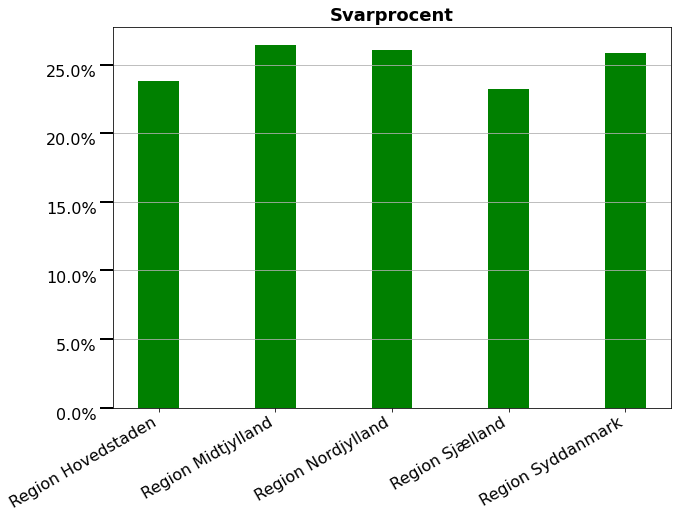

In [13]:
# samme split-apply-combine køres igen og gemmes i et midlertidigt dataframe
split_vars = ['Virk region'] 
apply_vars = ['point', 'brug_int']
apply_fcts = ['mean', 'size']

df_illu1 = bilag5.groupby(split_vars)[apply_vars].agg(apply_fcts)
# region == ukendt sorteres fra
df_illu1 = df_illu1[df_illu1.index != "Ukendt"]

# værdier og navne på x-aksen til plottet hentes ud af det midlertidige dataframe
x_labels = df_illu1.index.get_level_values(0)
l_point = list(df_illu1['point']['mean'])


values = np.array(l_point)
x = range(len(values))

# plot
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(x, values, 0.35, color='g')

# x-aksen
x_ticks = []
for i in range(len(x_labels)):
    x_ticks.append(i)
plt.xticks(x_ticks, x_labels, \
           rotation=30, \
           fontsize='16', \
           horizontalalignment='right', \
           verticalalignment='top')

# y-aksen
plt.yticks(
          fontsize='16', \
          horizontalalignment='right', \
          verticalalignment='top')
plt.tick_params(axis='y', direction='out', length=13, width=2)
# omdan y-aksen til procent
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

# tilføj grid
plt.grid(axis = 'y')

# tilføj titel
ax.set_title('Svarprocent', \
             fontweight='bold', \
             fontsize='18')

Text(0.5, 1.0, "Brug af DI's ydelser")

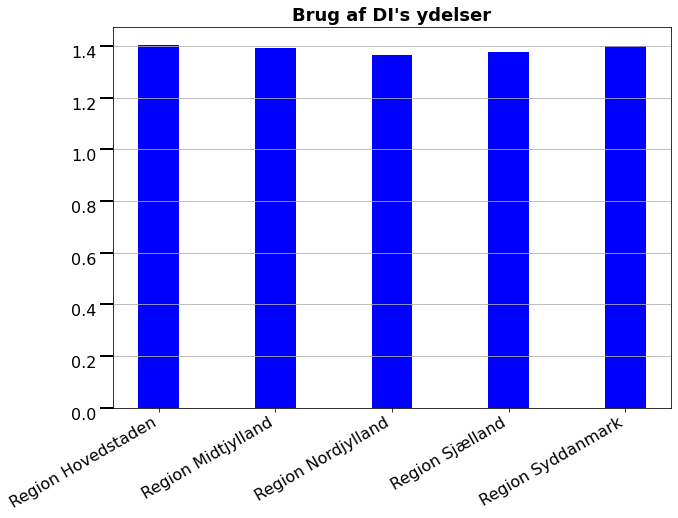

In [14]:
# samme split-apply-combine køres igen og gemmes i et midlertidigt dataframe
split_vars = ['Virk region'] 
apply_vars = ['point', 'brug_int']
apply_fcts = ['mean', 'size']

df_illu1 = bilag5.groupby(split_vars)[apply_vars].agg(apply_fcts)
# region == ukendt sorteres fra
df_illu1 = df_illu1[df_illu1.index != "Ukendt"]

# værdier og navne på x-aksen til plottet hentes ud af det midlertidige dataframe
x_labels = df_illu1.index.get_level_values(0)
l_brug = list(df_illu1['brug_int']['mean'])


values = np.array(l_brug)
x = range(len(values))

# plot
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(x, values, 0.35, color='b')

# x-aksen
x_ticks = []
for i in range(len(x_labels)):
    x_ticks.append(i)
plt.xticks(x_ticks, x_labels, \
           rotation=30, \
           fontsize='16', \
           horizontalalignment='right', \
           verticalalignment='top')

# y-aksen
plt.yticks(
          fontsize='16', \
          horizontalalignment='right', \
          verticalalignment='top')
plt.tick_params(axis='y', direction='out', length=13, width=2)

# tilføj grid
plt.grid(axis = 'y')

# tilføj titel
ax.set_title('Brug af DI\'s ydelser', \
             fontweight='bold', \
             fontsize='18')

### Segmentering
På baggrund af ovensteånde vælger vi at segmentere DI's medlemsvirksomheder på to dimensioner:
1. størrelse
2. branchefællesskab

For at undersøge dette vil vi nu konstruere et nyt dataframe med denne segmentering. Først oprettes dog en dikotom variabel for medlemmer, der ikke er medlem af et branchefællesskab:

In [15]:
branche_list = ["DI Byg", 
                "DI Energi", 
                "DI Fødevarer", 
                "DI Handel", 
                "DI Digital", 
                "DI Service", 
                "DI Rådgiverne", 
                "DI Transport", 
                "Bilbranchen",
                "DI Dansk Byggeri"]

def is_not_part(row):
    _total = 0
    for i in range(len(branche_list)):
        _total += row[branche_list[i]]
    if _total > 0:
        return 1
    return 0


bilag5['Intet branchefællesskab'] = bilag5.apply(is_not_part, axis=1)
bilag5.head(5)

,Virk postnr,Virk postdistrikt,Medlemsstatus,Medlemstype,DI antal ansatte opgivet,Branche kode,Virk region,Virk land,DI Byg,DI Energi,...,DI Dansk Byggeri,Brug,DI indmeldelsesdato,Har besvaret MTU2020,Unnamed: 25,Har besvaret NPM2020,størrelse,point,brug_int,Intet branchefællesskab
ID,,,,,,,,,,,,,,,,,,,,,
1,2300,København S,HOF,MEDLEM,7386,53.10.00,Region Hovedstaden,Danmark,0,0,...,0,Meget brug,2004-10-01,Ja,6,Nej,4:meget stor,1,2,1
2,8260,Viby J,HOF,MEDLEM,7232,10.51.00,Region Midtjylland,Danmark,0,0,...,0,Meget brug,2012-07-01,Nej,Ikke besvaret,Nej,4:meget stor,0,2,1
3,2860,Søborg,HOF,MEDLEM,5917,81.21.00,Region Hovedstaden,Danmark,0,0,...,0,Meget brug,2005-07-01,Ja,7,Nej,4:meget stor,1,2,1
4,7330,Brande,HOF,MEDLEM,5701,28.11.10,Region Midtjylland,Danmark,0,1,...,0,Meget brug,2014-01-01,Ja,9,Nej,4:meget stor,1,2,1
5,8960,Randers SØ,HOF,MEDLEM,5373,10.11.10,Region Midtjylland,Danmark,0,0,...,0,Meget brug,2002-07-01,Nej,Ikke besvaret,Nej,4:meget stor,0,2,0


Det nye dataframe kan nu konstreres:

In [16]:
#liste over 2. dimension: branchefællesskaber
branche_list = ["DI Byg", 
                "DI Energi", 
                "DI Fødevarer", 
                "DI Handel", 
                "DI Digital", 
                "DI Service", 
                "DI Rådgiverne", 
                "DI Transport", 
                "Bilbranchen",
                "DI Dansk Byggeri",
                "Intet branchefællesskab"]

#hver kolonne i det nye dataframe
branche = []
comp_size = []
point_mean = []
use_mean = []
size_list = []
sum_workers = []

#
apply_vars = ['point', 'brug_int', 'DI antal ansatte opgivet']
apply_fcts = ['mean', 'size', 'sum']

for i in range(len(branche_list)):
    temp_df = bilag5.groupby([branche_list[i], "størrelse"])[apply_vars].agg(apply_fcts)
    
    #fjerner branchedeltagelse=0
    temp_df = temp_df[temp_df.index.get_level_values(0)!=0]
    
    temp_list = temp_df.index.get_level_values(0)
    temp_list = [branche_list[i] for x in temp_list]
    branche.extend(list(temp_list))
    
    comp_size.extend(list(temp_df.index.get_level_values(1)))
    
    point_mean.extend(list(temp_df["point"]["mean"]))
    
    use_mean.extend(list(temp_df["brug_int"]["mean"]))
    
    size_list.extend(list(temp_df["point"]["size"]))
    
    sum_workers.extend(list(temp_df["DI antal ansatte opgivet"]["sum"]))
    
    
output_df = pd.DataFrame({'Branchefælleskab':branche,
                          'Størrelse':comp_size,
                          'Svarprocent':point_mean,
                          'Brug-score':use_mean,
                          'Antal medlemmer':size_list,
                          'Sum af ansatte':sum_workers})

output_df

,Branchefælleskab,Størrelse,Svarprocent,Brug-score,Antal medlemmer,Sum af ansatte
0,DI Byg,0:mikro,0.272727,1.090909,66,167
1,DI Byg,1:lille,0.118483,1.336493,211,2376
2,DI Byg,2:mellemstor,0.382609,1.704348,115,5317
3,DI Byg,3:stor,0.440000,1.880000,50,10149
4,DI Byg,4:meget stor,0.333333,2.000000,15,18387
5,DI Energi,0:mikro,0.219512,1.268293,41,87
6,DI Energi,1:lille,0.320755,1.377358,53,551
7,DI Energi,2:mellemstor,0.462687,1.701493,67,3244
8,DI Energi,3:stor,0.433962,1.924528,53,12643
9,DI Energi,4:meget stor,0.423077,2.000000,26,41326


In [17]:
output_df = output_df.sort_values(by="Svarprocent")
output_df.head(10)

,Branchefælleskab,Størrelse,Svarprocent,Brug-score,Antal medlemmer,Sum af ansatte
47,DI Dansk Byggeri,2:mellemstor,0.084971,1.628408,1577,52972
41,Bilbranchen,1:lille,0.093079,1.343675,419,4724
46,DI Dansk Byggeri,1:lille,0.110315,1.423337,2511,27502
1,DI Byg,1:lille,0.118483,1.336493,211,2376
36,DI Transport,1:lille,0.149385,1.260105,569,6181
48,DI Dansk Byggeri,3:stor,0.155914,1.408602,186,42594
51,Intet branchefællesskab,1:lille,0.162079,1.376685,3560,39102
21,DI Digital,1:lille,0.167630,1.430636,346,3846
42,Bilbranchen,2:mellemstor,0.178571,1.607143,140,5487
49,DI Dansk Byggeri,4:meget stor,0.181818,1.454545,22,22876


Dataframet inspiceres:

In [18]:
output_df = output_df.sort_values(by="Svarprocent", ascending=False)
output_df.head(10)

,Branchefælleskab,Størrelse,Svarprocent,Brug-score,Antal medlemmer,Sum af ansatte
29,DI Service,4:meget stor,0.650000,2.000000,20,34863
19,DI Handel,4:meget stor,0.600000,1.966667,30,40124
40,Bilbranchen,0:mikro,0.547619,1.125000,168,431
28,DI Service,3:stor,0.543478,1.847826,46,10125
13,DI Fødevarer,3:stor,0.500000,1.921875,64,13589
7,DI Energi,2:mellemstor,0.462687,1.701493,67,3244
3,DI Byg,3:stor,0.440000,1.880000,50,10149
39,DI Transport,4:meget stor,0.435897,1.948718,39,56420
8,DI Energi,3:stor,0.433962,1.924528,53,12643
18,DI Handel,3:stor,0.433962,1.886792,106,20703


In [19]:
output_df = output_df.sort_values(by="Brug-score")
output_df.head(10)

,Branchefælleskab,Størrelse,Svarprocent,Brug-score,Antal medlemmer,Sum af ansatte
0,DI Byg,0:mikro,0.272727,1.090909,66,167
25,DI Service,0:mikro,0.196262,1.093458,107,231
35,DI Transport,0:mikro,0.235154,1.109264,421,821
40,Bilbranchen,0:mikro,0.547619,1.125000,168,431
15,DI Handel,0:mikro,0.294643,1.156250,224,378
50,Intet branchefællesskab,0:mikro,0.263931,1.159827,2315,4391
45,DI Dansk Byggeri,0:mikro,0.264242,1.174545,1650,3124
30,DI Rådgiverne,0:mikro,0.354839,1.180645,310,423
10,DI Fødevarer,0:mikro,0.272727,1.181818,22,40
20,DI Digital,0:mikro,0.255435,1.206522,184,340


In [20]:
output_df = output_df.sort_values(by="Brug-score", ascending=False)
output_df.head(10)

,Branchefælleskab,Størrelse,Svarprocent,Brug-score,Antal medlemmer,Sum af ansatte
29,DI Service,4:meget stor,0.650000,2.000000,20,34863
9,DI Energi,4:meget stor,0.423077,2.000000,26,41326
4,DI Byg,4:meget stor,0.333333,2.000000,15,18387
14,DI Fødevarer,4:meget stor,0.266667,2.000000,15,23596
44,Bilbranchen,4:meget stor,0.400000,2.000000,5,5947
19,DI Handel,4:meget stor,0.600000,1.966667,30,40124
24,DI Digital,4:meget stor,0.200000,1.960000,25,30629
39,DI Transport,4:meget stor,0.435897,1.948718,39,56420
43,Bilbranchen,3:stor,0.300000,1.933333,30,6323
34,DI Rådgiverne,4:meget stor,0.357143,1.928571,14,18672


### Visualisering
Som nævnt har vi opstillet to dimensioner:
1. Størrelse
2. Branchefællesskab

Dette giver 55 segmenter, når vi medtager de medlemsvirksomheder, der ikke er en del af et branchefællesskab.

Hvordan hver af disse segmenter klarer sig på henholdsvis besvarelsesprocent og brugs-score vil nu illustreres:

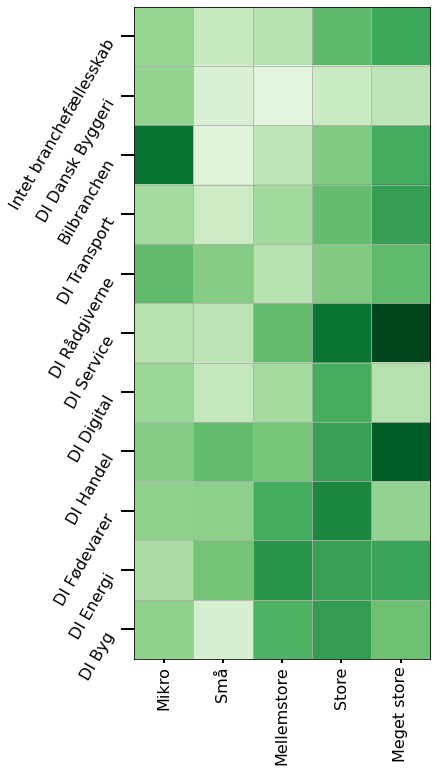

In [21]:
#først sorteres dataframet efter indekset igen
#dette giver en logisk struktur som følge af konstruktionen af datframet
output_df.sort_index(inplace=True)

#5 kategorier over størrelse, på forskellige branchefællesskaber
ncols = 5
nrows = len(branche_list)


list_svarprocent = output_df["Svarprocent"]
list_index = list(output_df.index)

data = np.zeros(nrows*ncols)
data[list_index] = list_svarprocent
data = np.ma.array(data.reshape((nrows, ncols)), mask=data==0)

fig, ax = plt.subplots(figsize=(6, 12))
ax.imshow(data, cmap="Greens", origin="lower", vmin=0)#, vmax=1)

# grid tilføjes
ax.set_xticks(np.arange(ncols+1)-0.5, minor=True)
ax.set_yticks(np.arange(nrows+1)-0.5, minor=True)
ax.grid(which="minor")
ax.tick_params(which="minor", size=0)

# labels på x-aksen:
x_ticks = [0, 1, 2, 3, 4]
x_labels = ['Mikro', 'Små', 'Mellemstore', 'Store', 'Meget store']
plt.xticks(x_ticks, x_labels, \
           rotation=90, \
           fontsize='16', \
           horizontalalignment='center', \
           verticalalignment='top')
plt.tick_params(axis='x', direction='out', width=2)

# labels på y-aksen:
y_labels = branche_list
y_ticks = []
for i in range(len(y_labels)):
    y_ticks.append(i)
plt.yticks(y_ticks, y_labels, \
          rotation=60, \
          fontsize='16', \
          horizontalalignment='right', \
          verticalalignment='top')
plt.tick_params(axis='y', direction='out', length=13, width=2)

plt.show()
#plottet roteres 90 grader til fremvisning

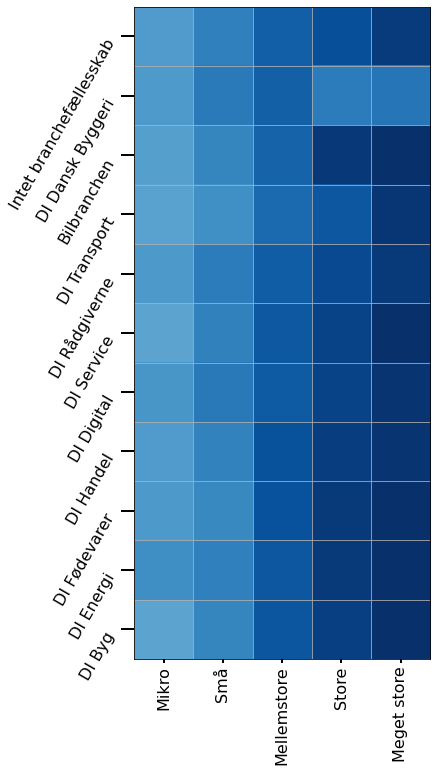

In [22]:
#først sorteres dataframet efter indekset igen
#dette giver en logisk struktur som følge af konstruktionen af datframet
output_df.sort_index(inplace=True)

#5 kategorier over størrelse, på forskellige branchefællesskaber
ncols = 5
nrows = len(branche_list)


list_brug = output_df["Brug-score"]
list_index = list(output_df.index)

data = np.zeros(nrows*ncols)
data[list_index] = list_brug
data = np.ma.array(data.reshape((nrows, ncols)), mask=data==0)

fig, ax = plt.subplots(figsize=(6, 12))
ax.imshow(data, cmap="Blues", origin="lower", vmin=0)#, vmax=1)

# grid tilføjes
ax.set_xticks(np.arange(ncols+1)-0.5, minor=True)
ax.set_yticks(np.arange(nrows+1)-0.5, minor=True)
ax.grid(which="minor")
ax.tick_params(which="minor", size=0)

# labels på x-aksen:
x_ticks = [0, 1, 2, 3, 4]
x_labels = ['Mikro', 'Små', 'Mellemstore', 'Store', 'Meget store']
plt.xticks(x_ticks, x_labels, \
           rotation=90, \
           fontsize='16', \
           horizontalalignment='center', \
           verticalalignment='top')
plt.tick_params(axis='x', direction='out', width=2)

# labels på y-aksen:
y_labels = branche_list
y_ticks = []
for i in range(len(y_labels)):
    y_ticks.append(i)
plt.yticks(y_ticks, y_labels, \
          rotation=60, \
          fontsize='16', \
          horizontalalignment='right', \
          verticalalignment='top')
plt.tick_params(axis='y', direction='out', length=13, width=2)

plt.show()
#plottet roteres 90 grader til fremvisning

### Prioritering blandt segmenter
Vi vælger DI skal prioritere at indhtente data fra medlemmer i det segment med laveste besvarelsesprocent blandt de medlemmer, som bruger ydelserne mindst.

Dette finder vi frem til ved at tage de segmenter, som har den laveste besvarelsesprocent blandt de segmenter, som har en gennemsnitlig brugs score under medianen.

In [23]:
# median af brugs score
print(output_df['Brug-score'].median())

1.6369000786782062


In [24]:
output_df[output_df['Brug-score'] < 1.628408370323399].\
                                sort_values(by="Svarprocent", ascending=True).\
                                head(11)

,Branchefælleskab,Størrelse,Svarprocent,Brug-score,Antal medlemmer,Sum af ansatte
41,Bilbranchen,1:lille,0.093079,1.343675,419,4724
46,DI Dansk Byggeri,1:lille,0.110315,1.423337,2511,27502
1,DI Byg,1:lille,0.118483,1.336493,211,2376
36,DI Transport,1:lille,0.149385,1.260105,569,6181
48,DI Dansk Byggeri,3:stor,0.155914,1.408602,186,42594
51,Intet branchefællesskab,1:lille,0.162079,1.376685,3560,39102
21,DI Digital,1:lille,0.167630,1.430636,346,3846
42,Bilbranchen,2:mellemstor,0.178571,1.607143,140,5487
49,DI Dansk Byggeri,4:meget stor,0.181818,1.454545,22,22876
26,DI Service,1:lille,0.183673,1.367347,196,2151


Fokus på DI Dansk Byggeri:

In [25]:
output_df[output_df['Branchefælleskab'] == "DI Dansk Byggeri"].\
                                sort_values(by="Størrelse", ascending=True).\
                                head(5)

,Branchefælleskab,Størrelse,Svarprocent,Brug-score,Antal medlemmer,Sum af ansatte
45,DI Dansk Byggeri,0:mikro,0.264242,1.174545,1650,3124
46,DI Dansk Byggeri,1:lille,0.110315,1.423337,2511,27502
47,DI Dansk Byggeri,2:mellemstor,0.084971,1.628408,1577,52972
48,DI Dansk Byggeri,3:stor,0.155914,1.408602,186,42594
49,DI Dansk Byggeri,4:meget stor,0.181818,1.454545,22,22876
